<a href="https://colab.research.google.com/github/gowthamich35/DataScienceZeotap/blob/main/Chunchu_Gowthami_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE

In [3]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Aggregating transaction data by customer
transaction_data = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [5]:
# Merging customer profile data with aggregated transaction data
customer_data = pd.merge(customers, transaction_data, on='CustomerID', how='left')

In [6]:

# Checking for missing values and fill or drop them as necessary
customer_data.fillna(0, inplace=True)

In [7]:
# Selecting features for clustering (transaction-related features)
features = customer_data[['total_spend', 'num_transactions', 'avg_transaction_value']]


In [8]:
# Normalize the features to ensure they are on the same scale
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [9]:
# Choosing the number of clusters (2-10)
k = 5  # You can experiment with different values of k

In [10]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(normalized_features)

In [11]:
# Calculating Davies-Bouldin Index to evaluate the clustering quality
db_index = davies_bouldin_score(normalized_features, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8380713195015239


In [12]:
# Performing PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_features)

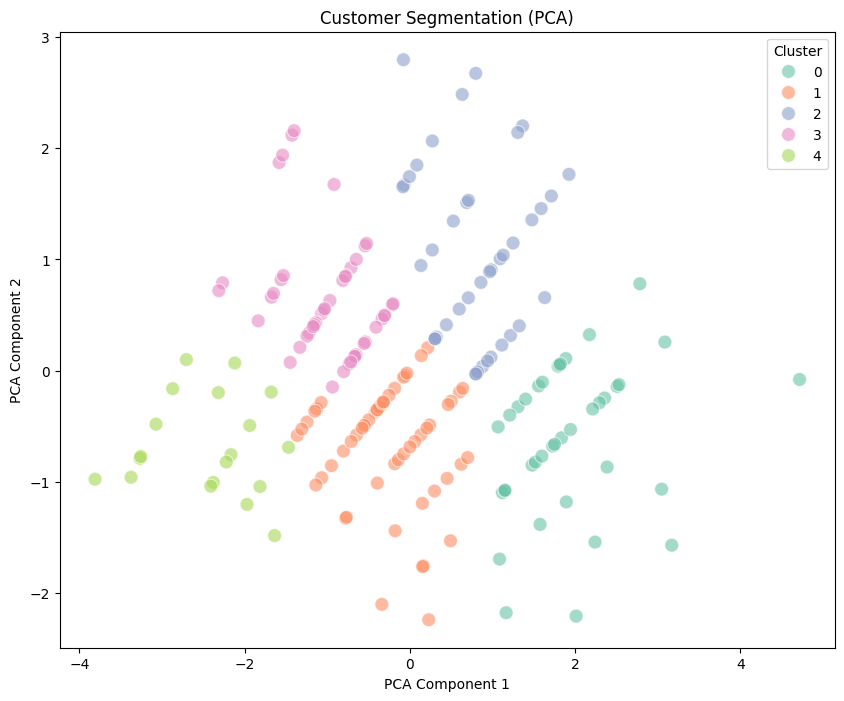

In [13]:
# Plotting clusters using PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100, alpha=0.6)
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [14]:
# Performing t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(normalized_features)

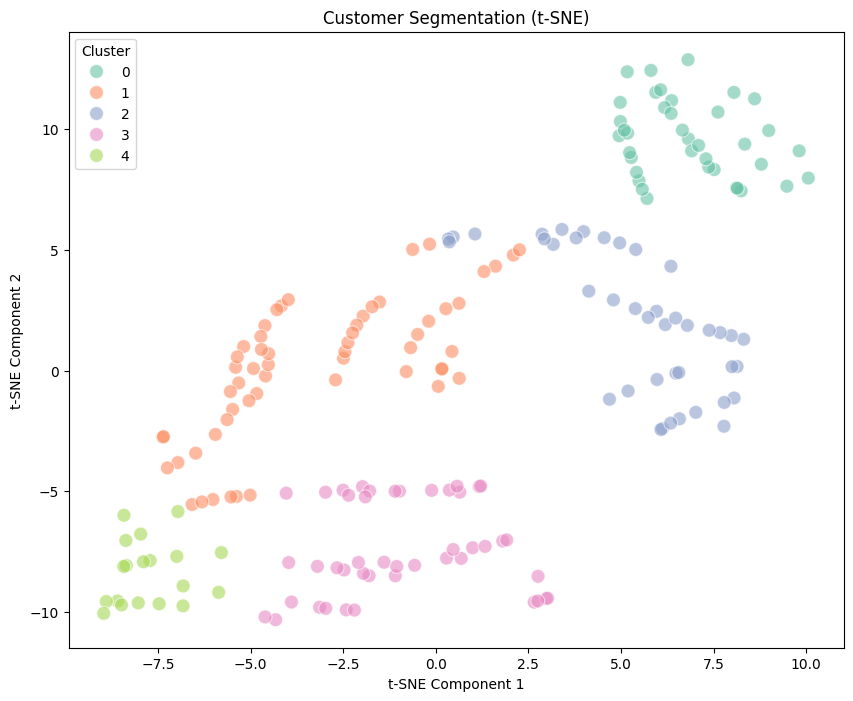

In [15]:
# Plotting clusters using t-SNE components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100, alpha=0.6)
plt.title('Customer Segmentation (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
# Show the cluster centers
print("Cluster Centers (mean values for each cluster):")
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(cluster_centers)


Cluster Centers (mean values for each cluster):
   total_spend  num_transactions  avg_transaction_value
0     1.431525          1.425138               0.291549
1    -0.243941          0.292945              -0.607052
2     0.531636         -0.154100               1.215092
3    -0.755564         -0.932674               0.135023
4    -1.488945         -1.187615              -1.703775


In [17]:
# Show average values of features per cluster
cluster_profiles = customer_data.groupby('Cluster').agg({
    'total_spend': 'mean',
    'num_transactions': 'mean',
    'avg_transaction_value': 'mean'
}).reset_index()
print(cluster_profiles)


   Cluster  total_spend  num_transactions  avg_transaction_value
0        0  6083.723158          8.157895             754.598033
1        1  3001.170175          5.649123             537.441933
2        2  4428.090732          4.658537             977.781902
3        3  2059.877333          2.933333             716.772056
4        4   710.588421          2.368421             272.407386


In [19]:
# Save the customer clusters to a CSV file
customer_data[['CustomerID', 'Cluster']].to_csv('clustered_customers.csv', index=False)

In [20]:
# Save clustering metrics to CSV
results = {
    'Number of Clusters': k,
    'Davies-Bouldin Index': db_index
}
results_df = pd.DataFrame([results])
results_df.to_csv('clustering_metrics.csv', index=False)